In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook

from utils import *
import sys
sys.path.append('/Users/theoares/lqcd/utilities')
from plottools import *
from scipy.integrate import quad

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['/Users/theoares/Library/Fonts/cmunrm.otf'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


TODO:
Extend a Gaussian sampled at a large number of points and plot the contour map of the continuation
Implement Hardy basis optimization with a small number of H
Think about smearing in conjunction with this algorithm

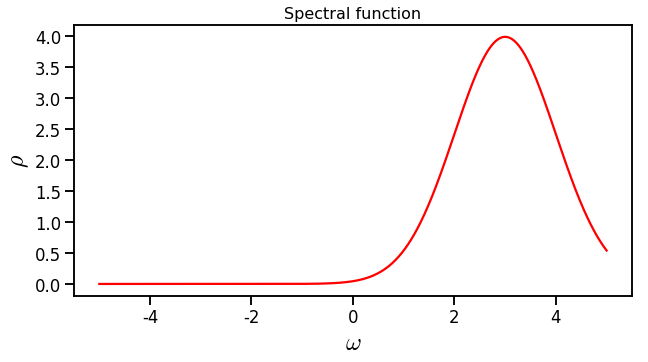

In [2]:
# Use a Gaussian spectral function centered at omega0 with width delOmega
# omega0 = 2.4
# delOmega = 0.35
omega0 = 3.0
delOmega = 1.0
rho = lambda omega : 10 * np.exp(- (omega - omega0) ** 2 / (2 * (delOmega ** 2))) / (np.sqrt(2 * np.pi) * delOmega)
# omega_line = np.linspace(0, 10, 1000)
omega_line = np.linspace(-5, 5, 1000)
rho_dat = np.array([rho(a) for a in omega_line])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, omega_line, rho_dat, colors = 'r', legend = False)

In [3]:
def signal(tau):
    integrand = lambda omega : np.exp(-omega * tau) * rho(omega)
    return quad(integrand, 0, np.inf)

In [4]:
# # Single delta spectral function
# m = 0.8
# T = 64
# # m2 = 1.8
# signal = lambda t : np.exp(- m * t) + np.exp(- m * (T - t))# + np.exp(-m2 * t)
# x = np.linspace(0.1, T, 1000)
# plt.figure()
# plt.plot(x, np.log(signal(x)))
# plt.title('Log[Fake correlator]')
# plt.ylabel('Log[G(τ)]')
# plt.xlabel('aτ')
# plt.show()

In [5]:
Nreal = 20000
omega_bounds = [-5, 5]
eta = 1e-2
np.random.seed(10)
# taus = np.float64(np.random.choice(np.arange(1, 60), 30))
# taus = range(40, 60)
# taus = np.arange(1, 50, 0.5)
taus = np.arange(1, 64, 1.)
print('Evaluating Greens function at tau = it = ' + str(taus))

Evaluating Greens function at tau = it = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63.]


In [6]:
# change this up
theta_mp1 = lambda z : 0
# theta_mp1 = hardy(0)

In [7]:
# eps = 1e-16
eps = 0
Y = np.array([gmp.mpc(0, t) for t in taus])
# C = np.array([gmp.mpc(signal(t)) for t in taus])
Cfloat = np.array([signal(t)[0] + (1j) * signal(t)[1] for t in taus])
C = np.array([gmp.mpc(val) for val in Cfloat])
zmesh = np.linspace(omega_bounds[0], omega_bounds[1], num = Nreal)
zspace = np.array([gmp.mpc(z, eta) for z in zmesh])

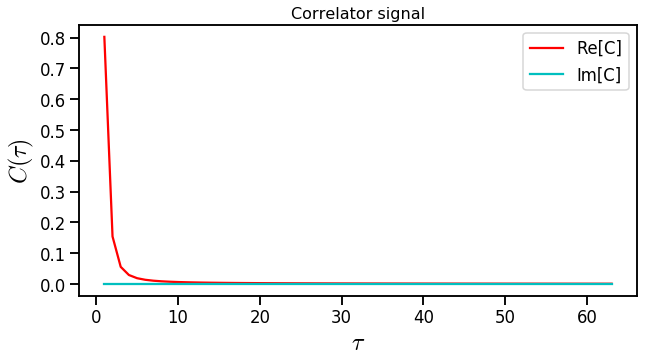

In [18]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, taus, Cfloat, fn_label = 'C', ax_label = ['$\\tau$', '$C(\\tau)$'], title = 'Correlator signal')

## FFT then continue

In [9]:
Ctilde_float = np.fft.fft(Cfloat)
Ctilde = np.array([gmp.mpc(z) for z in Ctilde_float])

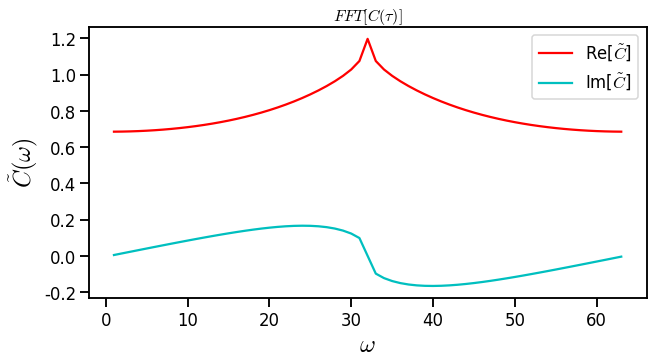

In [29]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, taus, np.fft.fftshift(Ctilde_float), fn_label = '$\\tilde{C}$', \
                        ax_label = ['$\\omega$', '$\\tilde{C}(\\omega)$'], title = '$FFT[C(\\tau)]$')

In [11]:
lam1 = np.array([h(z) for z in Ctilde])
phi1 = construct_phis(Y, lam1)
NGreal1 = analytic_continuation(Y, phi1, zspace, theta_mp1)
NGreal_float1 = np.array([np.complex(x) for x in NGreal1])

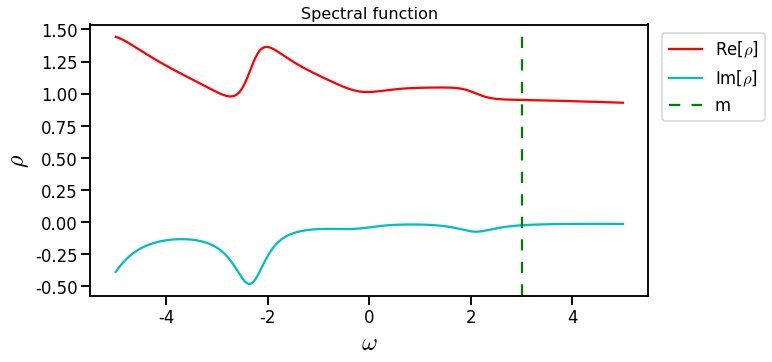

In [22]:
# other contexts: 'paper', 'poster', 'notebook'
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize=(10,5))
    plot_1d_function(ax, zmesh, NGreal_float1, ax_label = ['$\\omega$', '$\\rho$'], title = 'Spectral function', \
                    fn_label = '$\\rho$', legend = False)
    add_line(ax, omega0, color = 'g', dashes = (5, 5), label = 'm')
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')